# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 2. Методы нахождения оценок

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Загрузим все необходимые датасеты. Если что-то пошло не так, то просто скачайте файлы по ссылке вручную.

In [1]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

Downloading...
From: https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
To: /content/Cauchy.csv
100% 18.7k/18.7k [00:00<00:00, 17.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: /content/Weibull.csv
100% 17.9k/17.9k [00:00<00:00, 17.0MB/s]


In [2]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

## Задача 1

На высоте 1 метр от поверхности Земли закреплено устройство,
которое периодически излучает лучи на поверхность Земли (считайте,
что поверхность Земли представляет из себя прямую). Пусть $l$ —
перпендикуляр к поверхности Земли, опущенный из точки, в которой
закреплено устройство. Угол к прямой $l$ (под которым происходит
излучение) устройство выбирает случайно из равномерного
распределения на от\-резке $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$ (все выборы
осуществляются независимо). В этих предположениях точки пересечения
с поверхностью имеют распределение Коши с плотностью $p(x) =
\frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$
соответствует проекции точки расположения устройства на поверхность
Земли (направление оси и начало координат на поверхности Земли
выбраны заранее некоторым образом независимо от расположения
устройства). В файле Cauchy.csv находятся координаты точек
пересечения лучей с поверхностью Земли.

In [3]:
sample_1 = pd.read_csv("Cauchy.csv")["sample"].values

 Оцените параметр сдвига
методом максимального правдоподобия 
* по первым 10 измерениям
* по первым 100 измерениям
* по всей выборке. 

Оценку произведите по сетке (т.е. возьмите набор
точек с некоторым шагом и верните ту, на которой достигается
максимум функции правдоподобия). Известно, что параметр сдвига принадлежит интервалу $[-1000, 1000].$ Выберите шаг равным 0.01. Интервал можете итеративно уменьшать, но не стоит делать его длину меньше 50.


In [4]:
grid = np.arange(-1000, 1000, 0.01)

In [5]:
def likelihood(sample, grid, N=None):
  lh = 0
  if N is None:
    N = len(sample)
  for i in range(N):
    lh += np.log(np.pi * (1 + (sample[i] - grid) ** 2))
  return lh


In [6]:
lh_10 = likelihood(sample_1, grid, 10)
lh_100 = likelihood(sample_1, grid, 100)
lh_1000 = likelihood(sample_1, grid, 1000)


In [7]:
print('Параметр сдвига для n=10:', grid[np.argmin(lh_10)])
print('Параметр сдвига для n=100:', grid[np.argmin(lh_100)])
print('Параметр сдвига для n=1000:', grid[np.argmin(lh_1000)])

Параметр сдвига для n=10: 208.52999999890085
Параметр сдвига для n=100: 207.89999999890142
Параметр сдвига для n=1000: 207.97999999890135


Сравните полученные результаты с `sps.cauchy.fit`

In [8]:
print('Параметр сдвига из sps для n=10:', sps.cauchy.fit(sample_1[:10])[0])
print('Параметр сдвига из sps для n=100:', sps.cauchy.fit(sample_1[:100])[0])
print('Параметр сдвига из sps для n=1000:', sps.cauchy.fit(sample_1)[0])


Параметр сдвига из sps для n=10: 208.50577017532487
Параметр сдвига из sps для n=100: 207.87882548487846
Параметр сдвига из sps для n=1000: 207.97772827944334


## Задача 2
В банкомате "Тинькофф" в Новом Корпусе МФТИ каждую минуту подсчитывается баланс по
сравнению с началом дня (6 часов утра). В полночь работники банка
измеряют две величины: $X^1$ – максимальное значение баланса за
день, $X^2$ – значение баланса в полночь. Считается, что величина
$X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В течение 10 лет каждый день банк проводил
измерение величины $X,$ получив в результате выборку $X_1, \ldots,
X_{3652}.$ В файле Weibull.csv находятся соответствующие измерения.

In [9]:
sample_2 = np.loadtxt("Weibull.csv")

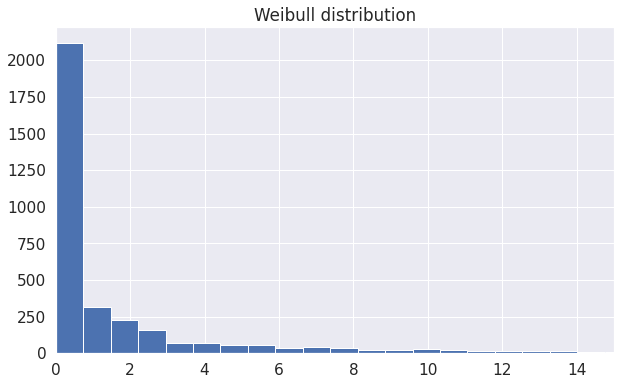

In [10]:
plt.figure(figsize=(10, 6))
plt.title("Weibull distribution")
plt.hist(sample_2, bins=500)
plt.xlim(0, 15)
plt.show()

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$
Подсчитайте эмпирическую функцию распределения и 
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки. Постройте график (`plt.scatter`) выделив данные за первые четыре года красным цветом (`sample_2[:1461]`), остальные синим (`sample_2[1461:]`). Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла. 


In [11]:
from statsmodels.distributions.empirical_distribution import ECDF

weib_ecdf = ECDF(sample_2)

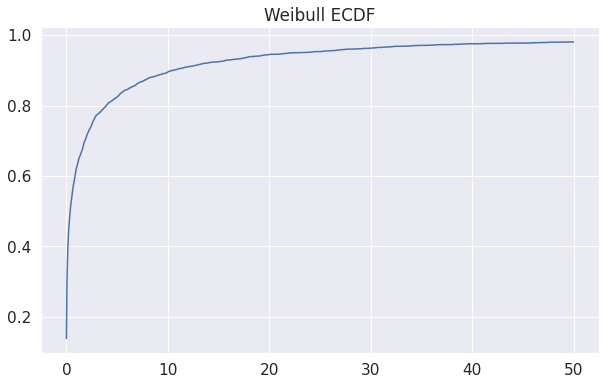

In [12]:
plt.figure(figsize=(10, 6))
grid = np.linspace(0, 50, 1000)
plt.title('Weibull ECDF')
plt.plot(grid, weib_ecdf(grid))
plt.show()

In [13]:
sample_2_first4 = sample_2[:1461][sample_2[:1461] > 0]
sample_2_last = sample_2[1461:][sample_2[1461:] > 0]

y_first4 = np.log(-np.log(1 - weib_ecdf(sample_2_first4)))
y_last = np.log(-np.log(1 - weib_ecdf(sample_2_last)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


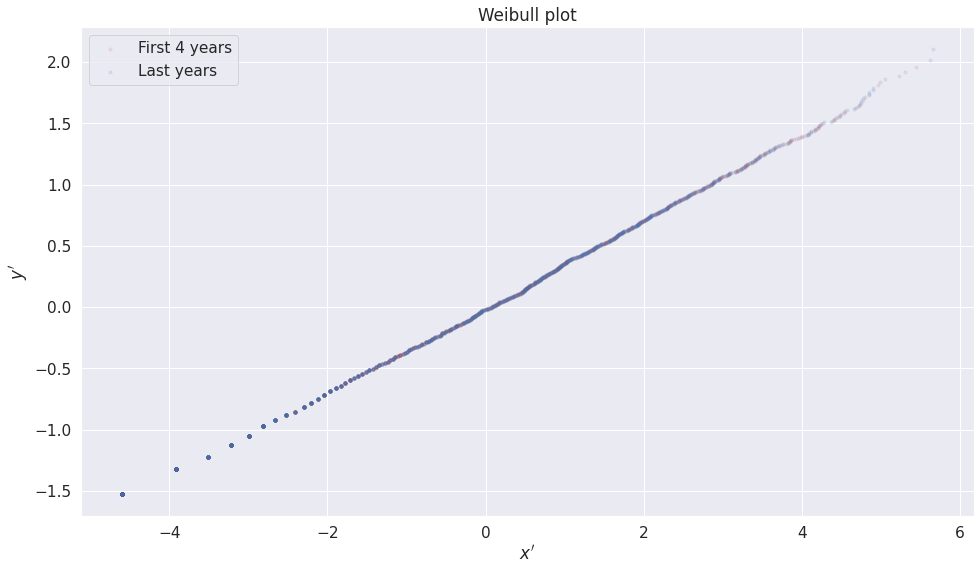

In [14]:
plt.figure(figsize=(16, 9))
plt.title('Weibull plot')
plt.scatter(np.log(sample_2_first4), y_first4, color='r', s=10, alpha=0.1, label='First 4 years')
plt.scatter(np.log(sample_2_last), y_last, color='b', s=10, alpha=0.1, label='Last years')
plt.xlabel(r"$x'$")
plt.ylabel(r"$y'$")
plt.legend()
plt.show()

Сделайте вывод.

**Вывод** 

Получили результат согласующийся с теоретическими выводами, что подтверждает то, что выборка из распределения Вейбула

Оцените параметр формы методом максимального правдоподобия 
* по
первым 4 годам; 
* по всей выборке.
Оценку произведите по сетке (в
логарифмической шкале). Известно, что $\log_{10}\gamma \in [-2, 2].$
Выберите шаг равным $10^{-3}.$

In [15]:
def likelihood(sample, grid, n):
  lh = np.log10(grid) * n + (grid - 1) * np.sum(np.log10(sample[:n][sample[:n] >0]))
  for i in range(n):
    lh -= sample[i] ** grid
  return lh

In [16]:
grid = np.logspace(-2, 2, 4000)

lh_first4 = likelihood(sample_2, grid, 1461)
lh_full = likelihood(sample_2, grid, 3652)

In [17]:
print('Параметр формы для первых 4х лет:', grid[np.argmax(lh_first4)])
print('Параметр формы для всей выборки:', grid[np.argmax(lh_full)])

Параметр формы для первых 4х лет: 0.33603274170957537
Параметр формы для всей выборки: 0.3276263660093939


Сравните результаты с `sps.weibull.fit(sample_2, fscale=1, floc=0)`

In [18]:
print('Параметр формы из sps для первых 4х лет:', sps.weibull_min.fit(sample_2[:1461])[0])
print('Параметр формы из sps всей выборки:', sps.weibull_min.fit(sample_2)[0])

Параметр формы из sps для первых 4х лет: 0.32353739326355224
Параметр формы из sps всей выборки: 0.3159756737095903


Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$). Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

**Вывод**

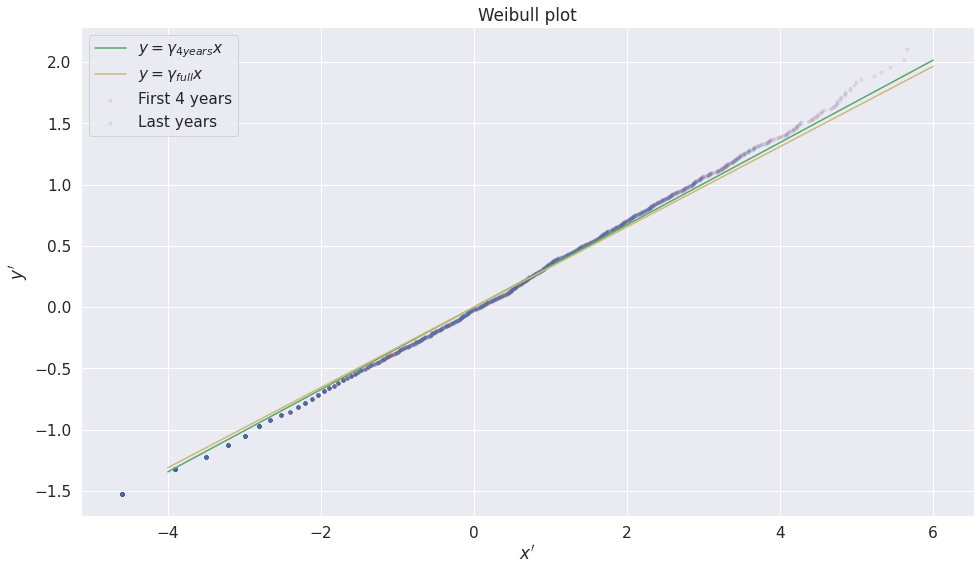

In [19]:
gamma_first4 = grid[np.argmax(lh_first4)]
gamma_full = grid[np.argmax(lh_full)]
x = np.linspace(-4, 6, 1000)

plt.figure(figsize=(16, 9))
plt.title('Weibull plot')
plt.plot(x, gamma_first4 * x, color='g', label=r'$y = \gamma_{4years} x$')
plt.plot(x, gamma_full * x, color='y', label=r'$y = \gamma_{full} x$')
plt.scatter(np.log(sample_2_first4), y_first4, color='r', s=10, alpha=0.1, label='First 4 years')
plt.scatter(np.log(sample_2_last), y_last, color='b', s=10, alpha=0.1, label='Last years')
plt.xlabel(r"$x'$")
plt.ylabel(r"$y'$")
plt.legend()
plt.show()

## Задача 3

Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**), $\theta = 3$ для всех распределений $(N = 1000).$ Для всех $n \leq N$ посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Постройте график ошибки оценки от реального значения ($|\hat\theta - \theta|_{l_1}$) относительно размера выборки.

In [20]:
N = int(1e3)
theta = 3

sample_norm = sps.norm(loc=0, scale=theta).rvs(size=N)
sample_uni = sps.uniform(loc=0, scale=theta).rvs(size=N)
sample_gamma = sps.gamma(a=1, scale=1/theta).rvs(size=N)

$\hat{\theta}_N = s^2$
, $\hat{\theta}_U = \overline{X} + \sqrt{3s^2}$
, $\hat{\theta}_{Γ} = \frac{\overline{X}}{s^2}$

In [21]:
s_norm = np.cumsum(sample_norm ** 2) / np.arange(1, N + 1) - (np.cumsum(sample_norm) / np.arange(1, N + 1)) ** 2
s_uni = np.cumsum(sample_uni ** 2) / np.arange(1, N + 1) - (np.cumsum(sample_uni) / np.arange(1, N + 1)) ** 2
s_gamma = np.cumsum(sample_gamma ** 2) / np.arange(1, N + 1) - (np.cumsum(sample_gamma) / np.arange(1, N + 1)) ** 2

theta_norm = s_norm
theta_uni = np.cumsum(sample_uni) / np.arange(1, N + 1) + np.sqrt(3 * s_uni)
theta_gamma = s_gamma / (np.cumsum(sample_gamma) / np.arange(1, N + 1))

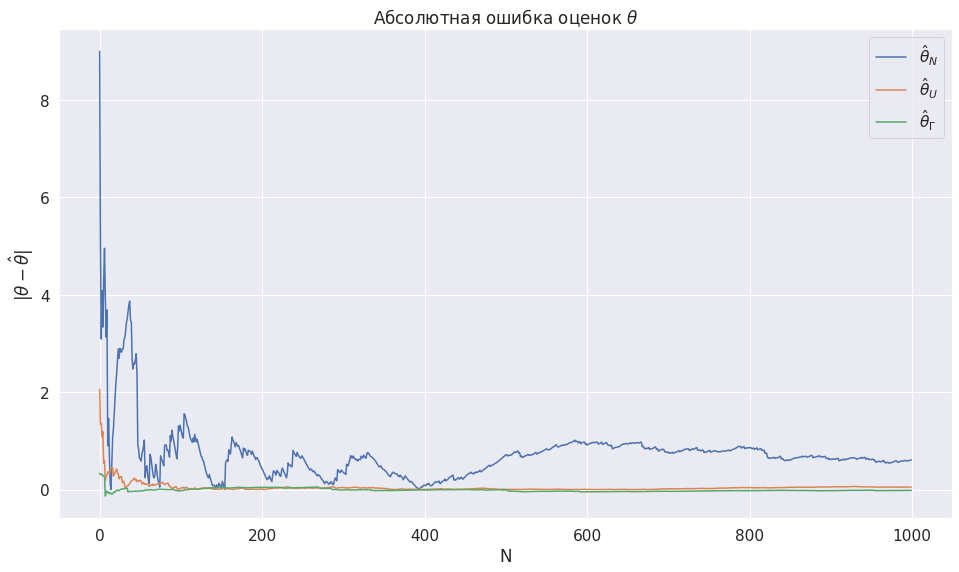

In [22]:
plt.figure(figsize=(16, 9))
plt.title(r"Абсолютная ошибка оценок $\theta$")
plt.plot(np.arange(N), abs([theta ** 2] * N - theta_norm), label=r'$\hat{\theta}_{N}$')
plt.plot(np.arange(N), abs([theta] * N - theta_uni), label=r'$\hat{\theta}_{U}$')
plt.plot(np.arange(N), [1/theta] * N - theta_gamma, label=r'$\hat{\theta}_{Γ}$')
plt.legend()
plt.xlabel('N')
plt.ylabel(r'$|\theta - \hat{\theta}|$')
plt.show()

### Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка). На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Давайте возьмем нашу выборку размера $N$ и сгенерируем из нее еще $K$ выборок. Более формально для каждой бутстрепной выборки N раз будем выбирать элементы из исходной выборки с возвращением. Полученная таким образом выборка будет содержать $\approx 63$% уникальных элементов, но это не страшно. Для всех $K$ выборок посчитаем оценку $\hat\theta$. Таким образом мы получим $K$ оценок параметра. Можно показать, что если размер бутстрепных выборок и исходной совпадают, то оценка дисперсии $s^2(\hat\theta)$, полученная из $K$ оценок, будет *хорошей*.

Для каждого распределения из предыдущего пункта (Пожалуйста, не пишите цикл по распределениям. Сделайте три отдельные ячейки) для каждого $K$ из `[10] + [50] + list(range(100, 1001, 100))` сгенерируйте K бутстрепных выборок и посчитайте дисперсию бутстрепных оценок и посчитайте среднее по K выборкам. Размер бутстрепной выборки сделайте равным $K$, незабудьте уменьшить размер исходной выборки до $K$. Постройте график следующим образом: по оси $x$ отложите значения $K$, красной линией обозначьте среднее значение $\hat\theta$ бутстрепных выборок для каждого $K$. Посчитайте стандартное отклонение оценки для каждого $K$ и закрасьте интервал $\mu(k) \pm \sigma(\hat\theta)$ (`plt.fillbetween`).



In [23]:
K_list = [10] + [50] + list(range(100, 1001, 100))

In [24]:
def bootstrap_norm(sample, K_list):
  mean = np.array([])
  std = np.array([])
  for k in K_list:
    subsamples = np.random.choice(sample[:k], (k, k))
    thetas = np.var(subsamples, axis = 1)
    mean = np.append(mean, thetas.mean())
    std = np.append(std, thetas.std())
  return mean, std

def bootstrap_uni(sample, K_list):
  mean = np.array([])
  std = np.array([])
  for k in K_list:
    subsamples = np.random.choice(sample[:k], (k, k))
    thetas = np.mean(subsamples, axis = 1) + np.sqrt(3 * np.var(subsamples, axis = 1))
    mean = np.append(mean, thetas.mean())
    std = np.append(std, thetas.std())
  return mean, std

def bootstrap_gamma(sample, K_list):
  mean = np.array([])
  std = np.array([])
  for k in K_list:
    subsamples = np.random.choice(sample[:k], (k, k))
    thetas = np.var(subsamples, axis = 1) / np.mean(subsamples, axis = 1)
    mean = np.append(mean, thetas.mean())
    std = np.append(std, thetas.std())
  return mean, std

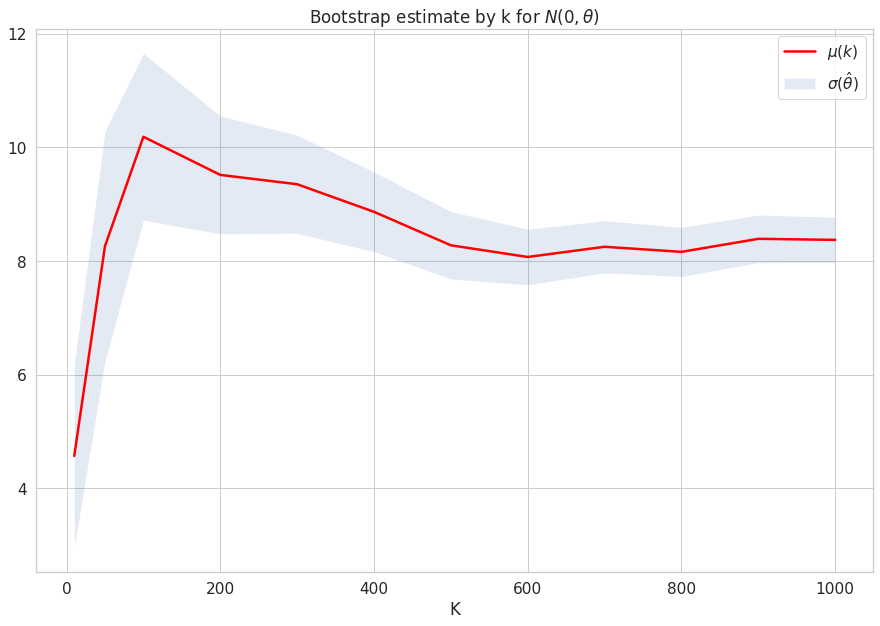

In [28]:
sns.set_style("whitegrid")

theta_mean_norm, theta_std_norm = bootstrap_norm(sample_norm, K_list)

plt.figure(figsize=(15, 10))
plt.plot(
    K_list, 
    theta_mean_norm,
    color='red', 
    linewidth=2.5, 
    label=r'$\mu(k)$'
) 
plt.fill_between(
    x = K_list, 
    y1 = theta_mean_norm + theta_std_norm,
    y2 = theta_mean_norm - theta_std_norm,
    alpha=0.15, 
    label=r'$\sigma(\hat{\theta})$'
)
plt.legend()
plt.xlabel('K')
plt.title(r'Bootstrap estimate by k for $N(0, \theta)$')
plt.show()

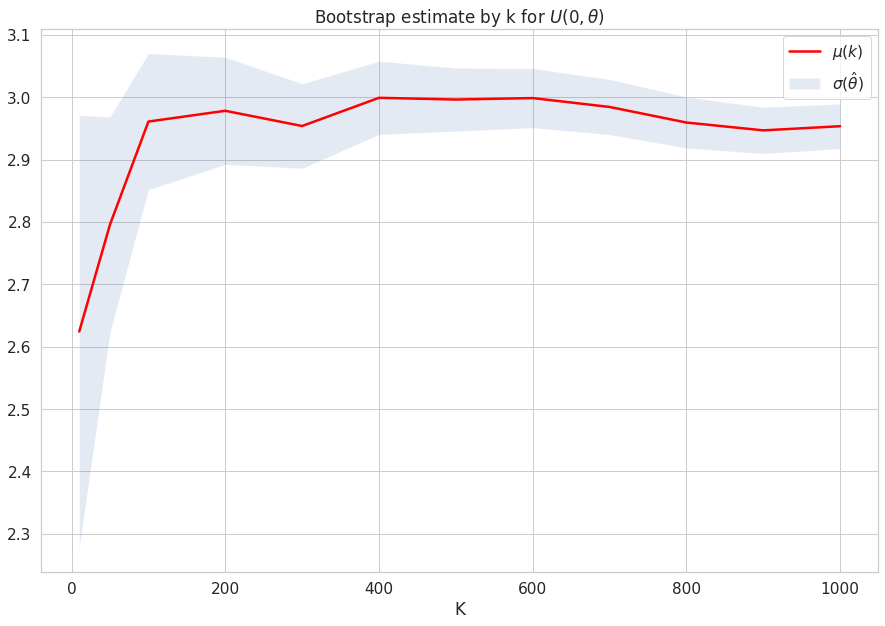

In [26]:
theta_mean_uni, theta_std_uni = bootstrap_uni(sample_uni, K_list)

plt.figure(figsize=(15, 10))
plt.plot(
    K_list, 
    theta_mean_uni,
    color='red', 
    linewidth=2.5, 
    label=r'$\mu(k)$'
) 
plt.fill_between(
    x = K_list, 
    y1 = theta_mean_uni + theta_std_uni,
    y2 = theta_mean_uni - theta_std_uni,
    alpha=0.15, 
    label=r'$\sigma(\hat{\theta})$'
)
plt.legend()
plt.xlabel('K')
plt.title(r'Bootstrap estimate by k for $U(0, \theta)$')
plt.show()

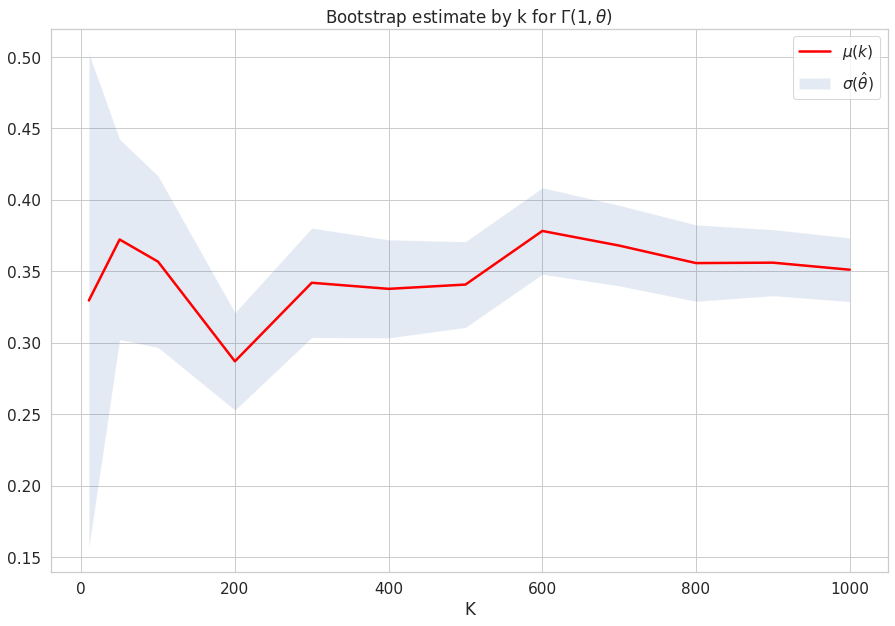

In [27]:
theta_mean_gamma, theta_std_gamma = bootstrap_gamma(sample_gamma, K_list)

plt.figure(figsize=(15, 10))
plt.plot(
    K_list, 
    theta_mean_gamma,
    color='red', 
    linewidth=2.5, 
    label=r'$\mu(k)$'
) 
plt.fill_between(
    x = K_list, 
    y1 = theta_mean_gamma + theta_std_gamma,
    y2 = theta_mean_gamma - theta_std_gamma,
    alpha=0.15, 
    label=r'$\sigma(\hat{\theta})$'
)
plt.legend()
plt.xlabel('K')
plt.title(r'Bootstrap estimate by k for $\Gamma(1, \theta)$')
plt.show()